__Compare FWI result with true model for the Overthrust model__

Daniel Köhn 
Kiel, 16/07/2016

__Import Libraries__

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage.filters import gaussian_filter
import pickle

**Import external colormap**

In [2]:
fp = open('../cmap_cm.pkl', 'rb')
my_cmap = pickle.load(fp)
fp.close()

__FD grid dimensions__

In [3]:
DH = 0.05
NX = 1952
NY = 1392
stage = 11

__Define fonts__

In [4]:
FSize = 15
font = {'color':  'black',
        'weight': 'normal',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 16, 9

**Read acquisition geometry**

In [5]:
# source positions
srcname = "../../source/source_kleinneudorf_s140.dat"
src_data = np.loadtxt(srcname, delimiter='\t', skiprows=1, unpack=False)

** Intersection point of p500 and p100**

In [6]:
# Estimate minimum and maximum x-values
minsrc = np.min(src_data[:,0])

print("minsrc = ", minsrc)

maxsrc = np.max(src_data[:,0])

print("maxsrc = ", maxsrc)

maxacq = np.max([maxsrc])
minacq = np.min([minsrc])

print("maxacq = ", maxacq, ", minacq = ", minacq)

minsrc =  2.98
maxsrc =  96.11
maxacq =  96.11 , minacq =  2.98


In [7]:
# calculate intersection point p500, s140
rel_int = 0.4762 # calculated

x_p500_s140_int = minacq + rel_int * (maxacq - minacq)
print("x_p500_s140_int = ",x_p500_s140_int)

# calculate intersection point s140, outcrop
rel_out = 0.41

x_s140_out = minacq + rel_out * (maxacq - minacq)
print("x_s140_out = ",x_s140_out)

x_p500_s140_int =  47.328506
x_s140_out =  41.1633


__Read FWI result and true model__

In [8]:
f = open("11_01_2019_s140_fmax_80Hz_gauss_var_sx_1p5_sz_0p5_full_offset/modelTest_vs_stage_" + str(stage) + ".bin")
#f = open("../../start/Kleinneudorf_init_s140_p500_fatt.vs")
data_type = np.dtype ('float32').newbyteorder ('<')
mod_true = np.fromfile (f, dtype=data_type)
mod_true = mod_true.reshape(NX,NY)
mod_true = np.transpose(mod_true)
mod_true = np.flipud(mod_true)

In [9]:
f = open("11_01_2019_s140_fmax_80Hz_gauss_var_sx_1p5_sz_0p5_full_offset/modelTest_vs_stage_" + str(stage) + ".bin")
#f = open("../../start/Kleinneudorf_init_s140_p500_fatt.rho")
data_type = np.dtype ('float32').newbyteorder ('<')
fwi = np.fromfile (f, dtype=data_type)
fwi = fwi.reshape(NX,NY)
fwi = np.transpose(fwi)
fwi = np.flipud(fwi)

__Find minimum values > 0__

In [10]:
EST_MINMAX = 0
if(EST_MINMAX==1):
    
    vsmin = 1e9
    rhomin = 1e9

    for i in range(0,NY-1):
        for j in range(0,NX-1):
        
            if(fwi[i,j]<vsmin and fwi[i,j] > 0.0):
                rhomin = fwi[i,j]
            
    for i in range(0,NY-1):
        for j in range(0,NX-1):
        
            if(mod_true[i,j]<vsmin and mod_true[i,j] > 0.0):
                vsmin = mod_true[i,j]
            
    print("vsmin = ", vsmin)
    print("rhomin = ", rhomin)

print("vsmax = ", np.max(mod_true))
print("rhomax = ", np.max(fwi))

vsmax =  923.379
rhomax =  923.379


__Wavefield clip value__ 

In [11]:
# Parameters from p500 FWI result
vsmin = 43.0
vsmax = 749.0
rhomin = 1550.0
rhomax = 2455.0

# Parameters from pnorte FWI result
#vsmin = 100.0
#vsmax = 710.0
#rhomin = 1550.0
#rhomax = 2380.0

# Parameters from p100 FWI result
#vsmin = 43.0
#vsmax = 890.0
#rhomin = 1550.0
#rhomax = 2241.0

__Define Axis__

In [12]:
x = np.arange(DH, DH*(NX+1), DH)
y = np.arange(DH, DH*(NY+1), DH)

__Define SubPlot__

In [13]:
def do_plot(n, model, cm, an, an1, title, vpmin, vpmax):
    
    ax=plt.subplot(1, 1, n)
    
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})    
    rc('text', usetex=True)
    
    # plot FWI result
    im1 = plt.imshow(model, cmap=cm, interpolation='none', extent=[0.0,NX*DH,0.0,NY*DH], vmin=vpmin, vmax=vpmax, aspect=1)
    
    # mark outcrop by arrow
    arr = plt.arrow(x_s140_out, 0, 0, 5.1, edgecolor='black', head_width=3, head_length=4, color='magenta')
    
    # plot source and receiver positions
    plt.plot(src_data[-1,0],src_data[-1,2],'r+')
    #plt.plot(rec_data1[:,0],rec_data1[:,1],'bv')
    #plt.plot(rec_data2[:,0],rec_data2[:,1],'bv')
    
    # plot p500-s140 intersection line
    #plt.plot([x_p500_s140_int,x_p500_s140_int],[0.0,NY*DH],'k-')
    
    # plot long_west-s140 intersection line
    # plt.plot([x_long_west_s140_int,x_long_west_s140_int],[0.0,NY*DH],'k-')
    
    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)
    a.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    a.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    #a.add_patch(arr)
    #plt.axis('scaled')
    plt.title(title, fontdict=font)
    plt.ylabel('Depth [m]', fontdict=font)
    plt.xlabel('Distance [m]', fontdict=font)
    plt.ylim(0,50)
    plt.gca().invert_yaxis()
    #ax.xaxis.set_major_formatter(plt.NullFormatter())
    
    # add annotation
    #plt.text(4,50,an1,fontdict=font,color='white',size=20)
    
    # fit and label colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2.5%", pad=0.05)
    cbar = plt.colorbar(im1, cax=cax)
    cbar.set_label(an, fontdict=font, labelpad=3)

__Plot SubPlots__

C:\Users\daniel_koehn\Anaconda3\lib\site-packages\matplotlib\patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
C:\Users\daniel_koehn\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


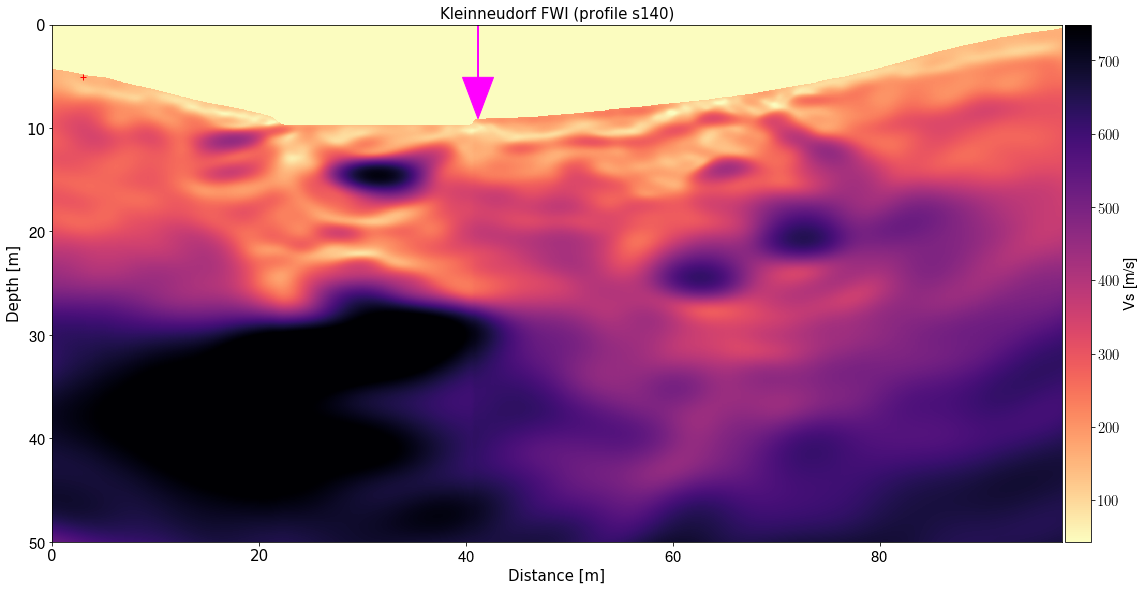

In [14]:
plt.close('all')
plt.figure()

#do_plot(1, mod_true, 'gist_gray_r', r'Vs [m/s]', '(a)', "Kleinneudorf FWI (profile 500)", vsmin, vsmax)
do_plot(1, mod_true, 'magma_r', r'Vs [m/s]', '(a)', "Kleinneudorf FWI (profile s140)", vsmin, vsmax)

#plt.savefig('stage_.png', bbox_inches='tight', format='png', dpi=100)
plt.savefig('stage_' + str(stage) + '.pdf', bbox_inches='tight', format='pdf')
#plt.savefig('stage_' + str(stage) + '.png', bbox_inches='tight', format='png',dpi=100)
plt.tight_layout()
plt.show()

In [15]:
from pyevtk.hl import pointsToVTK

# restrict model to source and receiver positions
nz1 = np.round(src_data[-1,0] / DH).astype(int)
nz2 = np.round(src_data[0,0] / DH).astype(int)
NZ1 = nz2-nz1

print("nz1 = ",nz1)
print("nz2 = ",nz2)

# correct depth -> height above sealevel
h1 = 90.7698            # height above sealevel of source 1
h1fd = - src_data[-1,2]  # depth of source on FD grid
depth2height = h1 - h1fd

# shift origin to UTM coordinate of 1st source
z1 = 594955.7         # easting of 1st source
x1 = 5996356.9        # northing of 1st source
x1fd = src_data[-1,0]  # 1st source x-position on FD grid

# shift profile from W-E to correct profile
z2 = 595045.3         # easting of last source
x2 = 5996377.2       # northing of 1st source
dnorth = abs(x2 - x1) / (NZ1 - 1)
deast = abs(z2 - z1) / (NZ1 - 1)

# Estimate number of points above the topography 
mod_out = np.flipud(mod_true)
ntopo = 0
for i in range(len(y)):
    for j in range(nz1,nz2): 

        if(mod_out[i,j]<1e-9):
            ntopo += ntopo
            
# subtract number of gridpoints above topography from NX1
NZ1mTOPO = NZ1 - ntopo            
            
# calcluate new UTM coordinates along profile p500
xp = np.zeros(NZ1mTOPO*NY)
yp = np.zeros(NZ1mTOPO*NY)
zp = np.zeros(NZ1mTOPO*NY)
vs_fwi = np.zeros(NZ1mTOPO*NY)

xp1 = np.zeros(NZ1)
zp1 = np.zeros(NZ1)

for j in range(nz1,nz2):
    xp1[j-nz1] = x1 + (j-nz1) * dnorth
    
for j in range(nz1,nz2):
    zp1[j-nz1] = z1 + (j-nz1) * deast    

# define new origin of the coordinate system
xp_min_500 = 5996299.3 
zp_min_500 = 594980.6

xp1 = xp1 - xp_min_500
zp1 = zp1 - zp_min_500

# Export to VTK point file 
h=0
for i in range(len(y)):
    for j in range(nz1,nz2):       
        if(mod_out[i,j]>1e-9):
            xp[h] = xp1[j-nz1]
            yp[h] = -y[i] + depth2height
            zp[h] = zp1[j-nz1]
            vs_fwi[h] = mod_out[i,j]
            h=h+1
        
pointsToVTK("./s140_fwi", xp, yp, zp, data = {'s140_fwi': vs_fwi})

nz1 =  60
nz2 =  1922


'D:\\ANGUS-II\\Kleinneudorf\\FWI_results\\FWI_s140_vs_rho\\s140_fwi.vtu'

In [16]:
xp[-1]

0.0

In [17]:
zp[-1]

0.0